# Test Out Logger

In [4]:
from AMDC_Logger import AMDC_Logger, find_mapfile

In [5]:
mfpath = find_mapfile(r'C:\Users\Nathan\Documents\GitHub\AMDC-Firmware\sdk\app_cpu1')
logger = AMDC_Logger(amdc, mfpath)

In [6]:
logger.sync()
logger.info()

	> log info
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:



In [7]:
logger.unregister_all()
logger.register('vsi_a', var_type = 'double', samples_per_sec = 10000)
logger.register('vsi_b', var_type = 'float', samples_per_sec = 10000)
logger.register('vsi_c', var_type = 'int', samples_per_sec = 10000)

	> log reg 0 LOG_vsi_a 537542920 10000 double
['log reg 0 LOG_vsi_a 537542920 10000 double', 'SUCCESS']
	> log reg 1 LOG_vsi_b 537542928 10000 float
['log reg 1 LOG_vsi_b 537542928 10000 float', 'SUCCESS']
	> log reg 2 LOG_vsi_c 537542932 10000 int
['log reg 2 LOG_vsi_c 537542932 10000 int', 'SUCCESS']


In [8]:
logger.clear_all()
logger.log(10)

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']


In [9]:
for i in range(10):
    data = logger.dump(how='binary', max_tries = 1)

	> log dump eth bin 0
Dumping: LOG_vsi_a
Dump took: 9.871  sec
Dump rate: 10131.163  sps
Num samples: 100000 

	> log dump eth bin 1
Dumping: LOG_vsi_b
Dump took: 9.200  sec
Dump rate: 10869.511  sps
Num samples: 100000 

	> log dump eth bin 2
Dumping: LOG_vsi_c
Dump took: 9.031  sec
Dump rate: 11072.936  sps
Num samples: 100000 

	> log dump eth bin 0
Dumping: LOG_vsi_a
Dump took: 9.777  sec
Dump rate: 10228.370  sps
Num samples: 100000 

	> log dump eth bin 1
Dumping: LOG_vsi_b
Dump took: 9.702  sec
Dump rate: 10307.198  sps
Num samples: 100000 

	> log dump eth bin 2
Dumping: LOG_vsi_c
Dump took: 9.621  sec
Dump rate: 10394.333  sps
Num samples: 100000 

	> log dump eth bin 0
Dumping: LOG_vsi_a
Dump took: 9.965  sec
Dump rate: 10035.260  sps
Num samples: 100000 

	> log dump eth bin 1
Dumping: LOG_vsi_b
Dump took: 10.980  sec
Dump rate: 9107.727  sps
Num samples: 100000 

	> log dump eth bin 2
Dumping: LOG_vsi_c
Dump took: 9.141  sec
Dump rate: 10939.919  sps
Num samples: 100000 

	

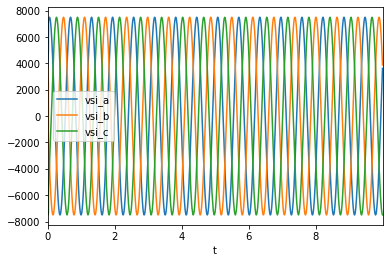

In [12]:
data.plot()

# Test Log Streaming

In [ ]:
import random
import multiprocess
import time

def worker(q):
    for i in range(5):
        q.put('text')
        
queue = multiprocess.Queue()

p = multiprocess.Process(target=worker, args=(queue,))
p.start()

# Wait for worker to finish
q.close()


p.join()

In [21]:
data = s1.recv(1)
data

b'h'

In [15]:
amdc.cmd('log stream start 0 1')

	> log stream start 0 1
['log stream start 0 1', 'SUCCESS']


['log stream start 0 1', 'SUCCESS']

# Test AMDC Class

In [1]:
from AMDC import AMDC

In [15]:
amdc = AMDC()
amdc.setup_comm_defaults('uart')
amdc.uart_init('COM6')

In [2]:
amdc = AMDC()
amdc.setup_comm_defaults('eth')
amdc.eth_init()
(s0,s1,s2,s3,s4) = amdc.eth_create_sockets()
amdc.eth_set_default_ascii_cmd_socket(s0)

In [3]:
amdc.connect()

In [35]:
amdc.disconnect()